In [6]:
# Classify the email using the binary classification method. 
# Email Spam detection has  two states: a) Normal State – Not Spam,
 #   b) Abnormal State – Spam. Use K-Nearest 
# Neighbors and Support Vector Machine for classification.
# Analyze their performance. 
# Dataset link: The emails.csv dataset on the Kaggle

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('emails.csv')

In [9]:
df.shape
# number of rows and column
# here are 5172 are emails and
# 3002 are their features

(5172, 3002)

In [10]:
df.head

<bound method NDFrame.head of        Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrastru

In [11]:
# Using this dataset we are going to predict the new email is a spam or not

In [12]:
# input data
x = df.drop(['Email No.','Prediction'], axis=1)

#ouptut
y = df['Prediction']

In [13]:
x.shape
# here 3000 features are input columns

(5172, 3000)

In [14]:
y.shape

(5172,)

In [15]:
x.info

<bound method DataFrame.info of       the  to  ect  and  for  of    a  you  hou  in  ...  enhancements  \
0       0   0    1    0    0   0    2    0    0   0  ...             0   
1       8  13   24    6    6   2  102    1   27  18  ...             0   
2       0   0    1    0    0   0    8    0    0   4  ...             0   
3       0   5   22    0    5   1   51    2   10   1  ...             0   
4       7   6   17    1    5   2   57    0    9   3  ...             0   
...   ...  ..  ...  ...  ...  ..  ...  ...  ...  ..  ...           ...   
5167    2   2    2    3    0   0   32    0    0   5  ...             0   
5168   35  27   11    2    6   5  151    4    3  23  ...             0   
5169    0   0    1    1    0   0   11    0    0   1  ...             0   
5170    2   7    1    0    2   1   28    2    0   8  ...             0   
5171   22  24    5    1    6   5  148    8    2  23  ...             0   

      connevey  jay  valued  lay  infrastructure  military  allowing  ff  dry  

In [16]:
x.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

In [17]:
set(x.dtypes)

{dtype('int64')}

In [18]:
# to check how much spam and not spam email are there in our dataset
# to check we use countplot
import seaborn as sns


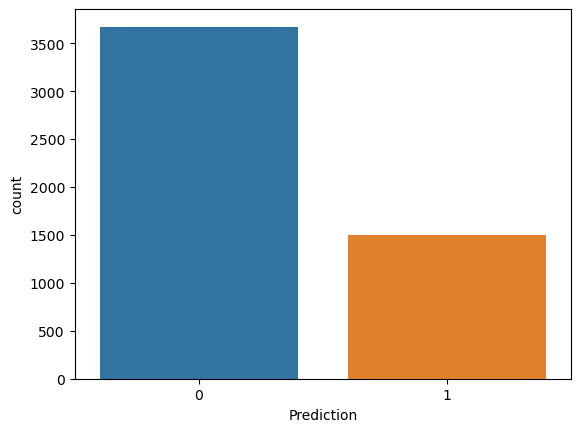

In [19]:
sns.countplot(x=y);

In [20]:
# y is a series which contain value count method
y.value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [21]:
# feature scaling 
# to reduce the impact of magnitude


In [83]:
# sklearn chya preprocessing package mdhe MinMaxScaler name ca ek class ahe
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # creating the object of the class

# we are scaling only input features

In [84]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [85]:
# cross validation
# testing data 25%

from sklearn.model_selection import train_test_split

x_train, x_test , y_train , y_test = train_test_split(x,y,random_state=0 , test_size = 0.25)

# we are using x_scaled data as a input

In [86]:
# original data
x_scaled.shape

(5172, 3000)

In [87]:
# training data 75%

x_train.shape

(3879, 3000)

In [88]:
# 25% testing data

x_test.shape

(1293, 3000)

In [89]:
# KNN Algorithm
# import the class
from sklearn.neighbors import KNeighborsClassifier

In [90]:
# create the object

# knn = KNeighborsClassifier(n_neighbors=5)
knn = KNeighborsClassifier(n_neighbors=5)

In [91]:
# Train the algorithm

knn.fit(x_train,y_train)

KNeighborsClassifier()

In [92]:
# Predict On test Data

y_pred = knn.predict(x_test)

In [93]:
# import the evalution metrics from

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

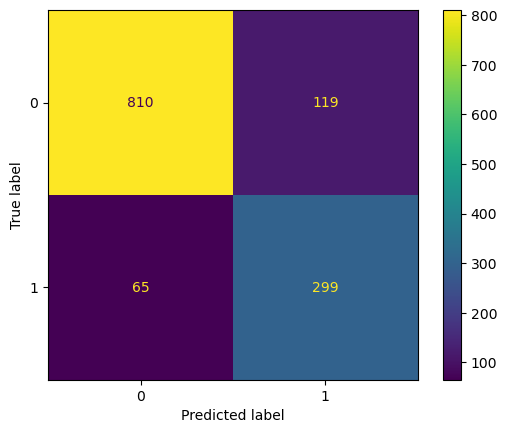

In [94]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [95]:
y_test.value_counts()

0    929
1    364
Name: Prediction, dtype: int64

In [96]:
accuracy_score(y_test,y_pred)

0.8576952822892498

In [97]:
# Classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       929
           1       0.72      0.82      0.76       364

    accuracy                           0.86      1293
   macro avg       0.82      0.85      0.83      1293
weighted avg       0.87      0.86      0.86      1293



In [98]:
# finding k ideal value

import numpy as np
import matplotlib.pyplot as plt

In [100]:
error = []
for k in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred != y_test))

In [101]:
error

[0.1423047177107502,
 0.12761020881670534,
 0.14694508894044858,
 0.13225058004640372,
 0.1423047177107502,
 0.13611755607115236,
 0.14153132250580047,
 0.1368909512761021,
 0.14153132250580047,
 0.1368909512761021,
 0.14617169373549885,
 0.13843774168600154,
 0.14617169373549885,
 0.14075792730085074,
 0.14694508894044858,
 0.139984532095901,
 0.1430781129156999,
 0.13921113689095127,
 0.13766434648105183,
 0.13611755607115236,
 0.14153132250580047,
 0.13225058004640372,
 0.1368909512761021,
 0.1368909512761021,
 0.13921113689095127,
 0.13766434648105183,
 0.139984532095901,
 0.14153132250580047,
 0.1430781129156999,
 0.14462490332559938,
 0.1423047177107502,
 0.1453982985305491,
 0.1430781129156999,
 0.14926527455529776,
 0.1500386697602475,
 0.14926527455529776,
 0.14926527455529776,
 0.14926527455529776,
 0.1500386697602475,
 0.15467904098994587]

In [102]:
knn = KNeighborsClassifier(n_neighbors=2)

In [103]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [104]:
y_pred = knn.predict(x_test)

In [105]:
accuracy_score(y_test,y_pred)

0.8723897911832946

# SUPPORT VECTOR MACHINE

In [108]:
from sklearn.svm import SVC

# this is support vector classifier 
# if the output variable is in the class then it is used
# if the o/p is in continuos then we use regressor i.e. SVR

In [110]:
svm = SVC(kernel='linear')

In [111]:
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [112]:
y_pred = svm.predict(x_test)

In [113]:
accuracy_score(y_test,y_pred)

0.954369682907966

In [ ]:
# Linear SVM : 0.954369682907966
# RBF SVM : 0.7996906419180201

In [124]:
svm = SVC(kernel='rbf')

In [125]:
svm.fit(x_train,y_train)

SVC()

In [126]:
y_pred = svm.predict(x_test)

In [127]:
accuracy_score(y_test,y_pred)

0.7996906419180201